In [1]:
%load_ext autoreload
%autoreload 2
from HPA_CC.data.dataset import RefClsPseudo
from pathlib import Path
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("/data/ishang/FUCCI-dataset-well/")
# name = "minimal_512"
name = "minimal"
hpa = True
ds = RefClsPseudo(data_dir, name, hpa=hpa, label="phase", scope=True)
X, Y = ds[:]
X, Y = X.numpy(), Y.numpy()

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_dino_hpa.pt
X shape: torch.Size([31737, 1536])
Loading /data/ishang/FUCCI-dataset-well/minimal_sample_phase_scope.pt
Y shape: torch.Size([31737, 4])


[0.29906583 0.17215158 0.09193963 0.08082194 0.07545595 0.04882501
 0.02619292 0.0216219  0.0188457  0.01266076]
0.8475812142714858


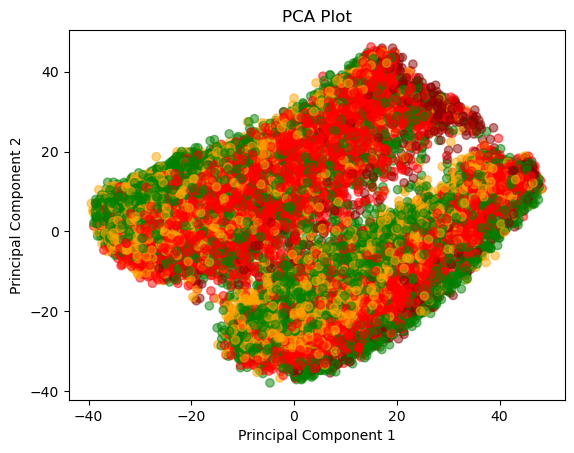

In [3]:
# Perform PCA
scaler = StandardScaler()
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaler.fit_transform(X))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Plot the data
color_map = {0: 'darkred', 1: 'red', 2: 'orange', 3: 'green'}
colors = [color_map[np.argmax(y)] for y in Y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()


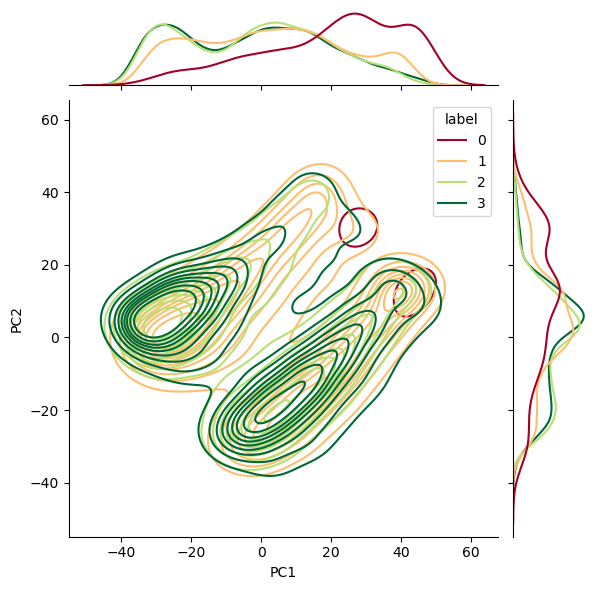

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'label': [np.argmax(y) for y in Y]})
sns.jointplot(data=df, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))

ValueError: 'c' argument has 31737 elements, which is inconsistent with 'x' and 'y' with size 33607.

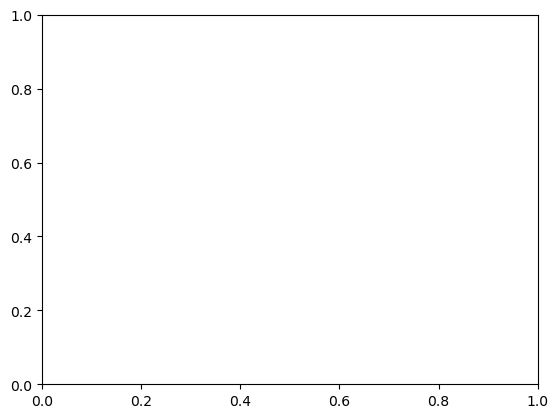

In [22]:
data_dir = Path("/data/ishang/FUCCI-dataset-well/")
ds = RefClsPseudo(data_dir, name, hpa=hpa, label="pseudotime")
X, Y = ds[:]
X, Y = X.numpy(), Y.numpy()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, alpha=0.5, cmap='RdYlGn')
plt.colorbar()

/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


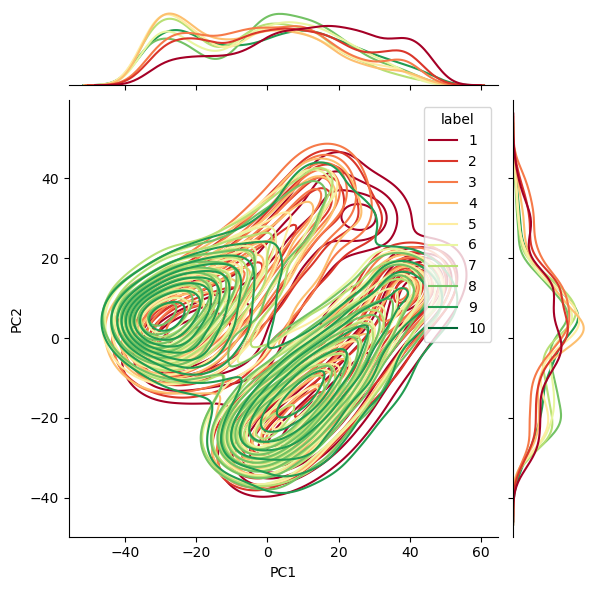

In [6]:
# Bucket the pseudotime into 10 bins
binned_Y = np.digitize(Y, bins=np.linspace(0, 1, 10))

# Create a new dataframe with binned pseudotime
df_binned = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'label': binned_Y})

# Create a jointplot
sns.jointplot(data=df_binned, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))


/tmp/ipykernel_2712357/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_2712357/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_2712357/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_2712357/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x

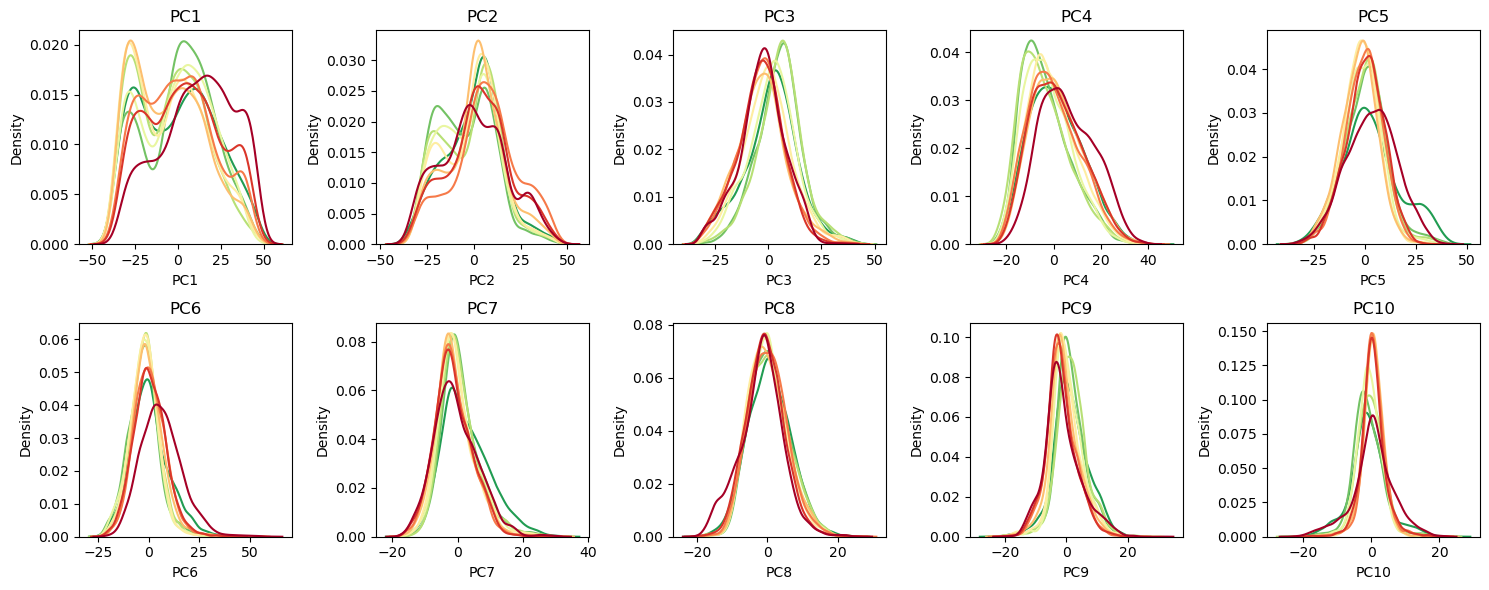

In [7]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

df_binned = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_binned['label'] = binned_Y

# Iterate over the PCs
for i in range(10):
    # Select the subplot
    ax = axes[i // 5, i % 5]
    
    # Create a KDE plot for the binned pseudotime of the current PC
    sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
    
    # Set the title of the subplot
    ax.set_title(f'PC{i+1}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


HPA vs FUCCI emebddings

In [11]:
from config import FUCCI_DS_PATH, HPA_DS_PATH
name = "minimal"
FUCCI_ds = RefClsPseudo(FUCCI_DS_PATH, name, hpa=True, label="pseudotime", scope=True, concat_well_stats=True)
FUCCI_X, FUCCI_Y = FUCCI_ds[:]
FUCCI_X, FUCCI_Y = FUCCI_X.numpy(), FUCCI_Y.numpy()
HPA_ds = RefClsPseudo(HPA_DS_PATH, name, hpa=True, inference=True, concat_well_stats=True)
HPA_X = HPA_ds[:]
HPA_X = HPA_X.numpy()

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_dino_hpa.pt
Loading /data/ishang/FUCCI-dataset-well/intensity_distributions_minimal.pt
X shape before intensity stats: torch.Size([31737, 1536])
X shape: torch.Size([31737, 2048])
Loading /data/ishang/FUCCI-dataset-well/minimal_sample_pseudotime.pt
Y shape: torch.Size([31737])
Loading /data/ishang/all_HPA-CC-dataset/embeddings_minimal_dino_hpa.pt
Loading /data/ishang/all_HPA-CC-dataset/intensity_distributions_minimal.pt
X shape before intensity stats: torch.Size([1870, 1536])
X shape: torch.Size([1870, 2048])


(31737, 2048)
2217
(1870, 2048)
134
[0.4232065  0.16523288 0.09333533 0.05134504 0.04510531 0.03288749
 0.02573572 0.02387515 0.020297   0.01559997]
[0.4232065  0.5884394  0.68177474 0.7331198  0.77822506 0.8111126
 0.8368483  0.8607235  0.8810205  0.89662045]


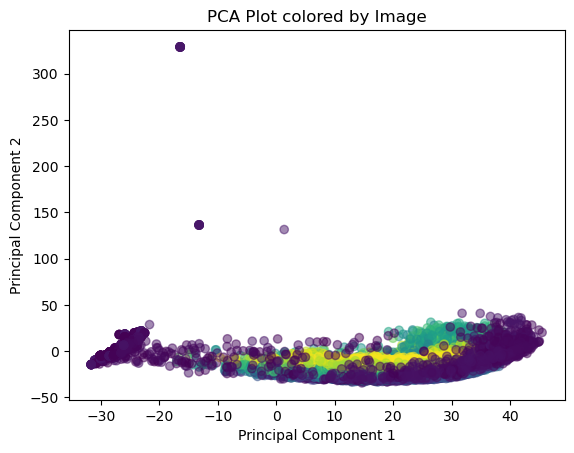

In [33]:
def get_img_labels(data):
    print(data.shape)
    well_label = 0
    img_labels = np.zeros((len(data),))
    uq_intensities = np.unique(data[:, 1536:], axis=0)
    # uq_intensities = np.unique(data[:, :1536], axis=0)
    for i in range(len(img_labels)):
        well_label = np.where(np.all(uq_intensities == data[i, 1536:], axis=1))[0][0]
        # well_label = np.where(np.all(uq_intensities == data[i, :1536], axis=1))[0][0]
        img_labels[i] = well_label
    print(len(np.unique(img_labels)))
    return img_labels, uq_intensities

fucci_img_labels, fucci_img_ints = get_img_labels(FUCCI_X)
hpa_img_labels, hpa_img_ints = get_img_labels(HPA_X)
img_labels = np.concatenate((fucci_img_labels, hpa_img_labels))

FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 0), np.random.choice(len(HPA_X), 134)
# FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 134), np.random.choice(len(HPA_X), 134)
# FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 3 * 134), np.random.choice(len(HPA_X), 134)
# FUCCI_sample, HPA_sample = np.random.choice(len(FUCCI_X), 4 * 134), np.random.choice(len(HPA_X), 0)
pca.fit(scaler.fit_transform(np.concatenate((FUCCI_X[FUCCI_sample], HPA_X[HPA_sample]))))
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
X_pca = pca.transform(scaler.transform(np.concatenate((FUCCI_X, HPA_X))))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=img_labels, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot colored by Image')
plt.show()

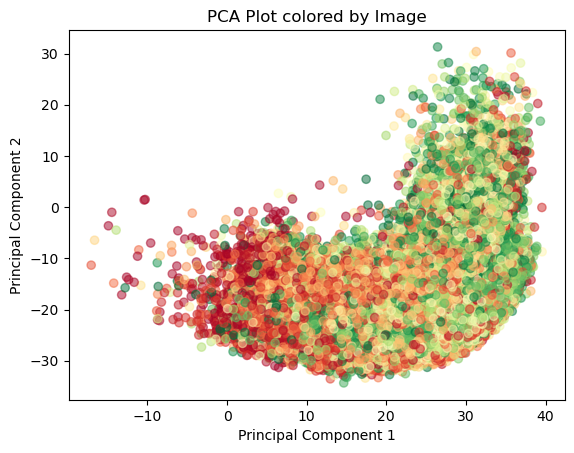

In [34]:
plt.scatter(X_pca[:len(fucci_img_labels), 0], X_pca[:len(fucci_img_labels), 1], c=FUCCI_Y, cmap="RdYlGn", alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot colored by Image')
plt.show()

/tmp/ipykernel_2712357/1537371799.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_2712357/1537371799.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_2712357/1537371799.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_2712357/1537371799.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binne

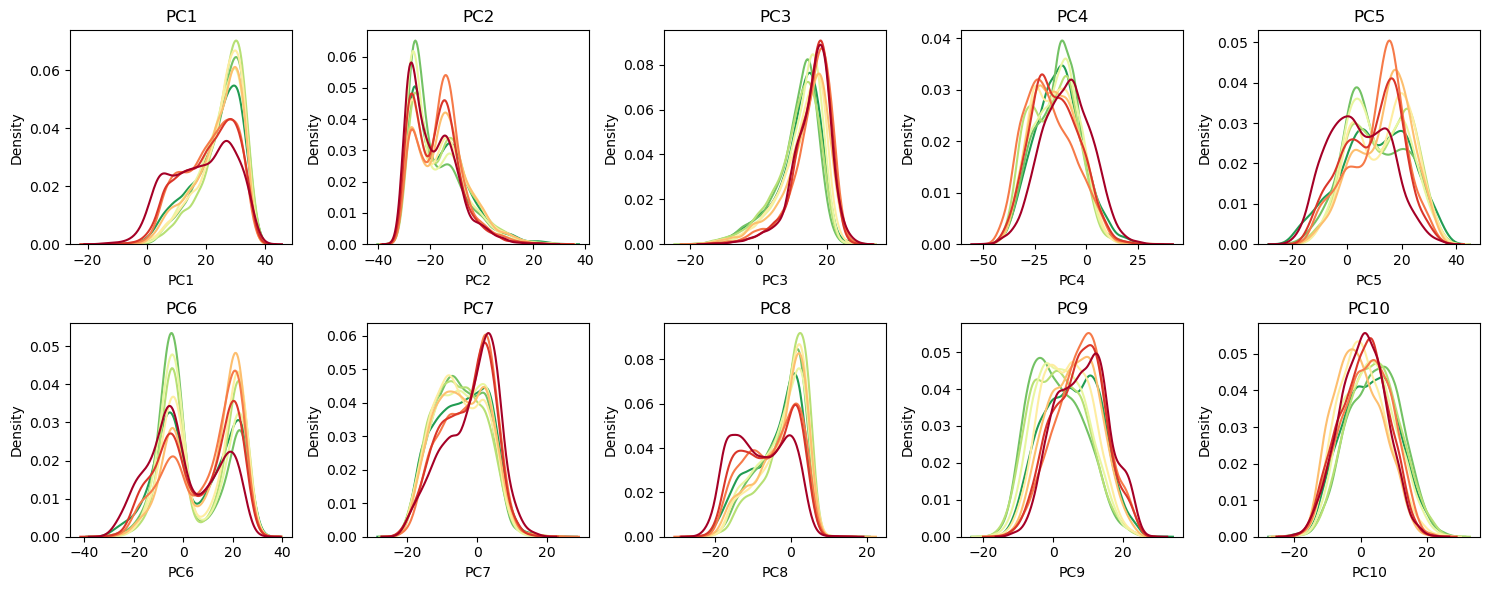

In [35]:
# Create a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

binned_Y = np.digitize(FUCCI_Y, bins=np.linspace(0, 1, 10))
df_binned = pd.DataFrame(X_pca[:len(fucci_img_labels)], columns=[f'PC{i+1}' for i in range(10)])
df_binned['label'] = binned_Y

# Iterate over the PCs
for i in range(10):
    # Select the subplot
    ax = axes[i // 5, i % 5]
    
    # Create a KDE plot for the binned pseudotime of the current PC
    sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
    
    # Set the title of the subplot
    ax.set_title(f'PC{i+1}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
